In [1]:
import pandas as pd

from lets_plot import *
from lets_plot.bistro import *
import polars as pl


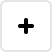
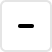
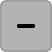
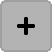
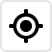
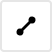
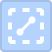
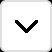
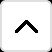
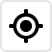
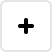
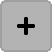
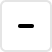
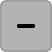
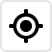
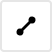
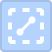
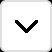
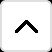
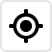

In [2]:
LetsPlot.setup_html()

In [3]:
data = {
    "Accounts": ["Product revenue", "Services revenue", "Fixed costs", "Variable costs"],
    "Values": [830_000, 290_000, -360_000, -150_000],
}

#### Hide specific labels

In [4]:
waterfall_plot(data, "Accounts", "Values", relative_labels="none") 

#### The color from the label is overridden by the theme.

In [5]:
waterfall_plot(data, "Accounts", "Values", label=element_text(color="black")) + theme(label_text=element_text(color="red")) 

#### Issues with Waterfall Plot customizability #1341


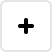
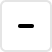
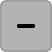
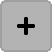
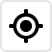
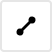
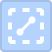
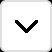
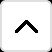
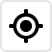
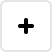
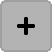
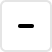
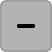
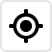
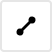
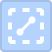
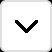
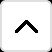
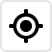

In [6]:
LetsPlot.setup_html()
stages = ('Initiated Registration', 'B4 Redirection', 'Reached Redirection', '@ Redirection', 'Redirected', 'After Redirection', 'Total Registered')
data = {
    'stage': stages,
    'count': [598, -264, 334, -4, 330, -85, 245],
    'measure': ['absolute', 'relative', 'total', 'relative', 'total', 'relative', 'total'],
}
df = pl.DataFrame(data)
# Add each step's/stage's percentage of initial count:
df = df.with_columns(
    ((pl.col('count')/pl.lit(598.) * pl.lit(100.)).abs().round()
    .cast(pl.String) + pl.lit("%"))
    .alias('pct')
    )

water = (waterfall_plot(df, 'stage', 'count', measure='measure', relative_labels=layer_labels().line("@pct"))  
 + scale_y_continuous(breaks=list(range(0, 601, 100)))
 + coord_cartesian(ylim=(0, 650))
)
water

#### Multiline

In [7]:
data = {
    'stage': ["A", "B", "C", "D", "E", "F", "ToTaL"],
    'count': [598, -264, 156, -4, 330, -85, 245],
    'pct': [0, 44.14, 46.71, 1.81, 67.9, 10.41, 0],
    'measure': ['absolute', 'relative', 'relative', 'relative', 'relative', 'relative', 'total'],
}

In [8]:
waterfall_plot(data, 'stage', 'count', measure='measure', relative_labels=layer_labels().line("@count").line("@pct%").format("pct", ".0f"))